C:\Users\abdulssekyanzi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 78s 6ms/step - loss: 0.7004 - val_loss: 0.7409
Epoch 2/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 0.6798 - val_loss: 0.7408
Epoch 3/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - loss: 0.6784 - val_loss: 0.7408
Epoch 4/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 97s 6ms/step - loss: 0.6879 - val_loss: 0.7408
Epoch 5/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 131s 6ms/step - loss: 0.6770 - val_loss: 0.7408
Epoch 6/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 93s 7ms/step - loss: 0.6863 - val_loss: 0.7408
Epoch 7/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 105s 8ms/step - loss: 0.6743 - val_loss: 0.7408
Epoch 8/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 108s 5ms/step - loss: 0.6856 - val_loss: 0.7408
Epoch 10/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 84s 5ms/step - loss: 0.6782 - val_loss: 0.7408
Epoch 12/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 0.6834 - val_loss: 0.7408
Epoch 13/50
13000/13000 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.6784 - val_loss: 

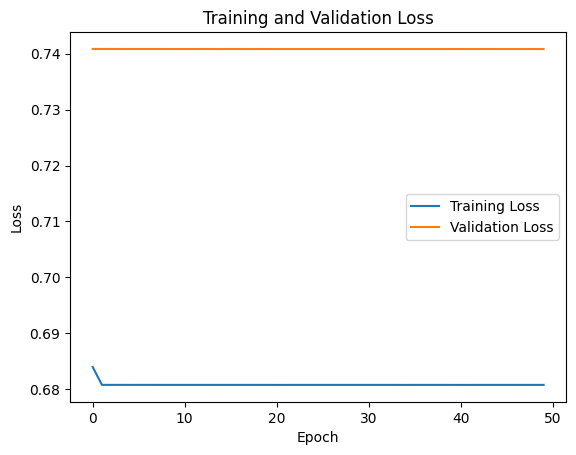

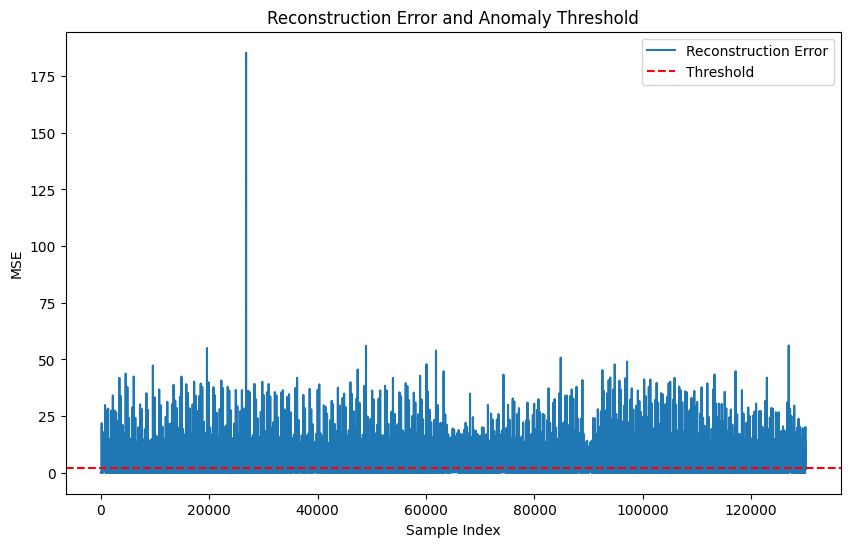

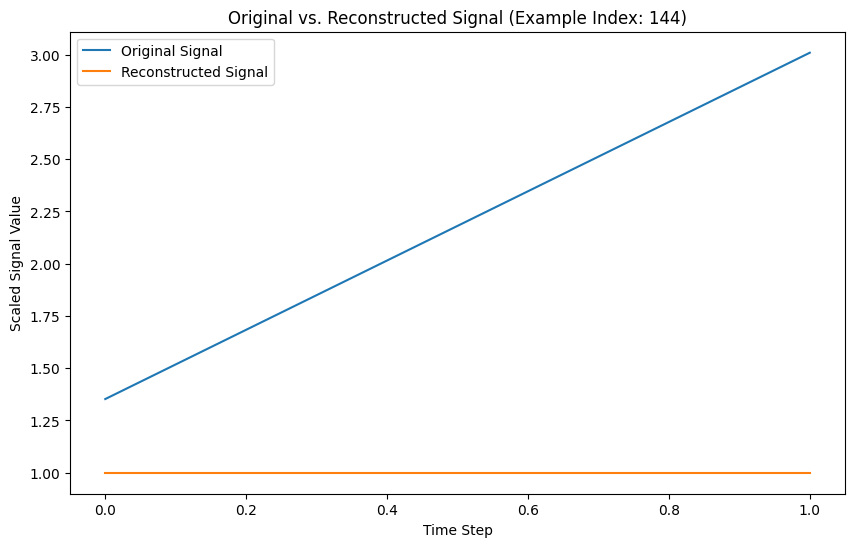

Anomaly Threshold (MSE): 1.8728465491920216
MSE values of Anomalies:
Index 144: MSE = 2.0809871546383594
Index 145: MSE = 5.032035435998322
Index 146: MSE = 9.629812154025998
Index 147: MSE = 16.59122130619341
Index 148: MSE = 21.8862490005055
Index 149: MSE = 20.667252546296496
Index 150: MSE = 18.826056068313026
Index 151: MSE = 15.882166184326758
Index 152: MSE = 8.794926675128103
Index 153: MSE = 2.382124869641694
Index 446: MSE = 1.9658833876388553
Index 447: MSE = 2.171907209087161
Index 448: MSE = 2.419481693851243
Index 449: MSE = 3.1710470924302037
Index 450: MSE = 3.407626767171184
Index 451: MSE = 3.2763905089955285
Index 452: MSE = 2.5360247645430087
Index 459: MSE = 3.4103075568288848
Index 460: MSE = 8.576743819146461
Index 461: MSE = 14.350888421173993
Index 462: MSE = 17.511323117431186
Index 463: MSE = 17.832543853483642
Index 464: MSE = 17.83873501238319
Index 465: MSE = 16.89102890018657
Index 466: MSE = 12.119881836675408
Index 467: MSE = 6.4678741143193665
Index 46

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, RepeatVector, TimeDistributed, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv')
data = df[['MLII', 'V5']].values

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reshape for Conv1D Autoencoder
data_reshaped = data_scaled.reshape(data_scaled.shape[0], data_scaled.shape[1], 1)

# Split data (you might need to manually select normal data)
X_train, X_test = train_test_split(data_reshaped, test_size=0.2, shuffle=False)

# Build a Conv1D Autoencoder
model = Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(2, 1)),
    MaxPooling1D(2, padding='same'),
    Conv1D(16, 3, activation='relu', padding='same'),
    Flatten(),
    RepeatVector(2),
    TimeDistributed(Dense(1, activation='sigmoid'))
])

model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Calculate reconstruction error
reconstructions = model.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=(1, 2))

# Set a threshold and identify anomalies
threshold = np.quantile(mse, 0.95)  # example threshold
anomalies = np.where(mse > threshold)[0]
print("Anomalies:", anomalies)

# Visualize Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Visualize Reconstruction Error
plt.figure(figsize=(10, 6))
plt.plot(mse, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.legend()
plt.title('Reconstruction Error and Anomaly Threshold')
plt.show()

# Visualize Reconstructed Signal vs. Original (Example)
if len(anomalies) > 0:
    example_index = anomalies[0]
    example_original = X_test[example_index].reshape(-1,)
    example_reconstructed = reconstructions[example_index].reshape(-1,)

    plt.figure(figsize=(10, 6))
    plt.plot(example_original, label='Original Signal')
    plt.plot(example_reconstructed, label='Reconstructed Signal')
    plt.xlabel('Time Step')
    plt.ylabel('Scaled Signal Value')
    plt.legend()
    plt.title(f'Original vs. Reconstructed Signal (Example Index: {example_index})')
    plt.show()
else:
    print("No anomalies found. Skipping signal visualization.")

# Print the threshold value.
print(f"Anomaly Threshold (MSE): {threshold}")

# Print the MSE values of the anomalies.
if len(anomalies) > 0:
    print("MSE values of Anomalies:")
    for anomaly_index in anomalies:
        print(f"Index {anomaly_index}: MSE = {mse[anomaly_index]}")
